In [1]:
# Import necessary packages
import os
import pathlib
import re # Parsing info out of file names

import earthaccess # Access NASA data from the cloud
import geopandas as gpd # Working with vector data
import pandas as pd # Aggregating and data manipulation
import rioxarray as rxr # Work with raster data

In [2]:
# Set up a project data directory
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'habitat-suitability'
)

os.makedirs(data_dir, exist_ok=True)

data_dir

'C:\\Users\\riede\\earth-analytics\\data\\habitat-suitability'

## Define study area:

* Download the USFS National Grassland Units

* Select study sites: Caddo National Grassland and Sheyenne National Grassland

,OBJECTID,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE.AREA,SHAPE.LEN,geometry
0,187245,281771010328,Fort Pierre National Grassland,209044.225,0.095149,1.455518,"POLYGON ((-100.0841 44.28163, -100.0841 44.278..."
1,187246,295507010328,Butte Valley National Grassland,19489.170,0.008557,0.853736,"MULTIPOLYGON (((-121.99601 41.84049, -121.9960..."
2,187247,295508010328,Kiowa National Grassland,144281.321,0.058543,9.858642,"MULTIPOLYGON (((-104.30415 36.08063, -104.3041..."
3,187248,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31082 46.51457, -97.3056 4..."
4,187249,295510010328,Cedar River National Grassland,6717.517,0.003157,0.999947,"MULTIPOLYGON (((-101.82222 45.95897, -101.8170..."
5,187250,295511010328,Black Kettle National Grassland,33103.349,0.013340,4.561060,"MULTIPOLYGON (((-99.9166 35.71892, -99.91662 3..."
6,187251,295512010328,Rita Blanca National Grassland,94127.091,0.038271,6.652113,"MULTIPOLYGON (((-102.62994 36.44073, -102.6298..."
7,187252,295513010328,Thunder Basin National Grassland,626249.208,0.282888,44.088050,"MULTIPOLYGON (((-105.46006 43.31909, -105.4601..."
8,187253,295514010328,McClellan Creek National Grassland,1401.715,0.000562,0.115902,"POLYGON ((-100.86004 35.20951, -100.86009 35.2..."
9,187254,295515010328,Caddo National Grassland,68479.549,0.026940,1.159342,"MULTIPOLYGON (((-95.85493 33.79814, -95.85495 ..."


<Axes: >

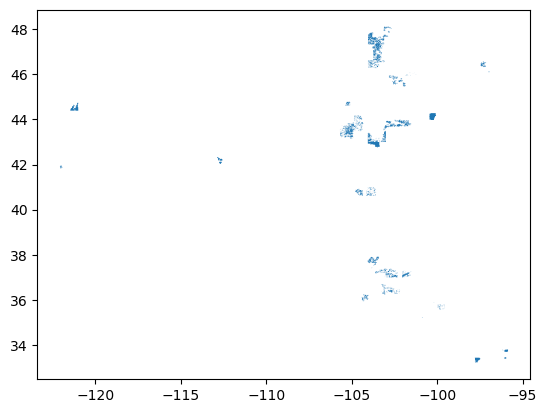

In [5]:
# Set up the grassland URL
grasslands_url = ("https://apps.fs.usda.gov/arcx/rest/services"
    "/EDW/EDW_NationalGrassland_01/MapServer/0"
    "/query?where=1%3D1&outFields=*&geometry=&geometry"
    "Type=esriGeometryEnvelope&inSR=4326&spatialRel=esriSpatialRelIntersects&outSR=4326&f=json")

# Set up a path to save the data on your machine
grasslands_dir = os.path.join(data_dir, 'grasslands_dir')

# Make the grasslands directory
os.makedirs(grasslands_dir, exist_ok=True)

# Join grasslands shapefile path
grasslands_path = os.path.join(grasslands_dir, 'S_USA.NationalGrassland.shp')

# Only download once
if not os.path.exists(grasslands_path):
    grasslands_gdf = gpd.read_file(grasslands_url)
    grasslands_gdf.to_file(grasslands_path)

# Check that the URL is correct
grasslands_gdf = gpd.read_file(grasslands_path)

# Display grasslands_gdf and plot grasslands to check download
display(grasslands_gdf)
grasslands_gdf.plot()

In [ ]:
shey_grasslands_gdf = grasslands_gdf[grasslands_gdf['GRASSLANDN']]

,OBJECTID,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE.AREA,SHAPE.LEN,geometry
3,187248,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31082 46.51457, -97.3056 4..."
9,187254,295515010328,Caddo National Grassland,68479.549,0.026940,1.159342,"MULTIPOLYGON (((-95.85493 33.79814, -95.85495 ..."


<Axes: >

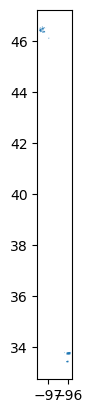

In [ ]:
# Select study areas from grasslands_gdf
shey_caddo_grasslands_gdf = grasslands_gdf[
    grasslands_gdf['GRASSLANDN'].isin(['Sheyenne National Grassland', 'Caddo National Grassland'])]
display(shey_caddo_grasslands_gdf)
shey_caddo_grasslands_gdf.plot()

In [ ]:
#MAYBE THIS CELL ISN'T NECESSARY B/C I DID THE ABOVE?
#  Try downloading from the URL
# Define a path to save the study area
# Only download once
#if not os.path.exists(study_area_path):
    # Download the study area

    # Save the study area

# Load the study area

# Make a plot to check that the data is what we expect

SyntaxError: incomplete input (852376419.py, line 11)

In [ ]:
# Select the study sites

# Make two site maps

## Load in soil data

For each grassland:
    Download at least one soil variable from the POLARIS dataset as raster data.

In [ ]:
# Define the download URL template for the soil data

# List out all the soil files we will need to download

output_da_list = {}
# Loop through each of the soil files
for ... in soil_files:
    # Download raster data

    # Unzip the raster data

    # Extract metadata from the file name

    # Only download once -- Save raster data to the disk

    # Load the raster data into Python, mask and scale and squeeze w/ .tif files

    # Make sure that the CRS matches between the vector and raster data, this could also be done up above the output_da_list is defined
    #.to_crs(4326)

    # Crop the raster data
    cropped_da = ...

    # Make a plot to check the download

    output_da_list.append(cropped_da)

# Merge tiles



## Load in elevation data

For each grassland: Download elevation from the SRTM as raster data.

In [ ]:
# Use earthaccess API

## Load in climate data

For each grassland: Download one climate variable from the MACAv2 THREDDS data server as raster data.

## Derive a topographic variable

For each grassland: calculate at least one derived topographic variable.

In [ ]:
# Make sure you're in a crs with units of meters, like UTM, not degrees

## Harmonize data

In [ ]:
# possibly use ds.rio.reproject_match() method from rioxarray

# Build fuzzy logic model

## Create at least one figure for each grassland/climate scenario combination

In [ ]:
# EXAMPLE of a for loop and accumulating the answers

a_list = [1, 2, 3, 4]

#w/o this accumulator list, when we run the for loop below w/o the prints, we just see 16
squared_number_list = []

for number in a_list:
    #print(number)
    squared_number = number**2
    #print(squared_number)
    squared_number_list.append(squared_number)

print(squared_number)
squared_number_list

16


[1, 4, 9, 16]